## Project: Finding Donors for *CharityML*

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sb
import matplotlib.pyplot as plt

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
data.info()
display(data.head(n=10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


<h6>There are no null values in our dataset</h6>

In [2]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [3]:
data[data.duplicated(keep=False)].sort_values(by=list(data.columns),axis=0)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32051,17,Private,10th,6.0,Never-married,Handlers-cleaners,Own-child,White,Male,0.0,0.0,15.0,United-States,<=50K
42555,17,Private,10th,6.0,Never-married,Handlers-cleaners,Own-child,White,Male,0.0,0.0,15.0,United-States,<=50K
16398,17,Private,10th,6.0,Never-married,Handlers-cleaners,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
22259,17,Private,10th,6.0,Never-married,Handlers-cleaners,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
22990,17,Private,10th,6.0,Never-married,Handlers-cleaners,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23234,70,Private,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,5.0,United-States,<=50K
18063,90,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
28757,90,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
2121,90,Private,Some-college,10.0,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0.0,0.0,35.0,United-States,<=50K


In [4]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data.loc[data['income'] == '>50K'].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data.loc[data['income'] == '<=50K'].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k*100/n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


In [5]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

<h6>Bar plots of income</h6>

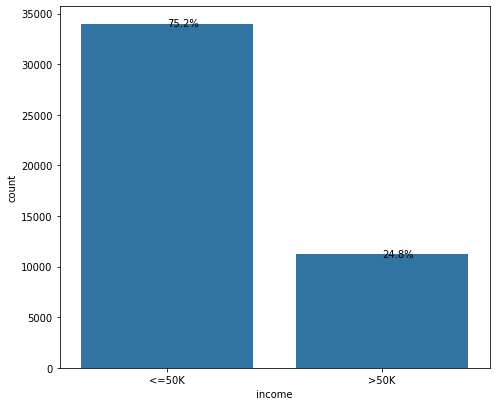

In [6]:
base_color = sb.color_palette()[0]
incomecounts = data['income'].value_counts()
incomeorder = incomecounts.index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
sb.countplot(data = data, x = 'income', color = base_color,order = incomeorder,ax=ax);
for i in range(incomecounts.shape[0]):
    count = incomecounts[i]
    pctstring = '{:0.1f}%'.format(100*count/data.shape[0])
    plt.text(i,count+1,pctstring,va = 'center');

<h6>Since only 25% of people have more than 50k income developing a model with accuracy as metric won''t be useful</h6>

<h6>Bar plot of work class</h6>

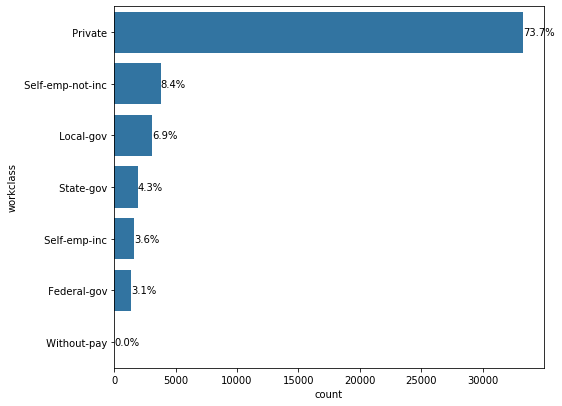

In [7]:
base_color = sb.color_palette()[0]
workclasscounts = data['workclass'].value_counts()
workclassorder = workclasscounts.index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
sb.countplot(data = data, y = 'workclass', color = base_color,order = workclassorder,ax=ax);
for i in range(workclasscounts.shape[0]):
    count = workclasscounts[i]
    pctstring = '{:0.1f}%'.format(100*count/data.shape[0])
    plt.text(count+1,i,pctstring,va = 'center');

<h6>Bar plot of education</h6>

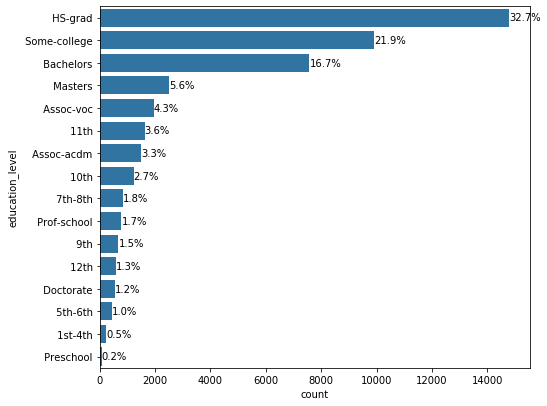

In [8]:
base_color = sb.color_palette()[0]
education_levelcounts = data['education_level'].value_counts()
education_levelorder = education_levelcounts.index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
sb.countplot(data = data, y = 'education_level', color = base_color,order = education_levelorder,ax=ax);
for i in range(education_levelcounts.shape[0]):
    count = education_levelcounts[i]
    pctstring = '{:0.1f}%'.format(100*count/data.shape[0])
    plt.text(count+1,i,pctstring,va = 'center');

<h6>Bar plot of marital-status</h6>

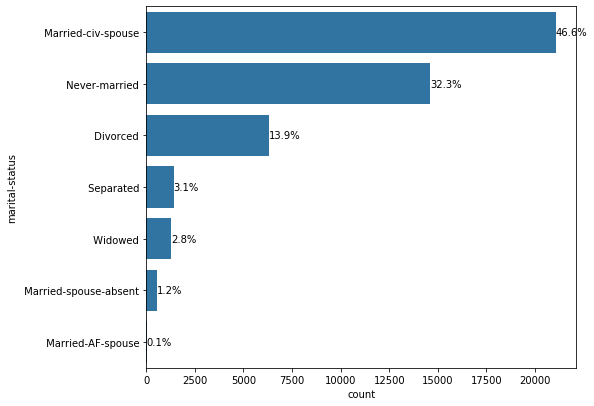

In [9]:
base_color = sb.color_palette()[0]
maritalstatuscounts = data['marital-status'].value_counts()
maritalstatusorder = maritalstatuscounts.index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
sb.countplot(data = data, y = 'marital-status', color = base_color,order = maritalstatusorder,ax=ax);
for i in range(maritalstatuscounts.shape[0]):
    count = maritalstatuscounts[i]
    pctstring = '{:0.1f}%'.format(100*count/data.shape[0])
    plt.text(count+1,i,pctstring,va = 'center');

<h6>Bar plot of occupation</h6>

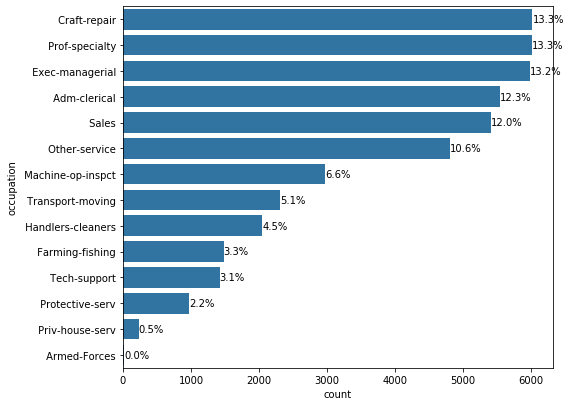

In [10]:
base_color = sb.color_palette()[0]
occupationcounts = data['occupation'].value_counts()
occupationorder = occupationcounts.index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
sb.countplot(data = data, y = 'occupation', color = base_color,order = occupationorder,ax=ax);
for i in range(occupationcounts.shape[0]):
    count = occupationcounts[i]
    pctstring = '{:0.1f}%'.format(100*count/data.shape[0])
    plt.text(count+1,i,pctstring,va = 'center');

<h6>Bar plot of relationship</h6>

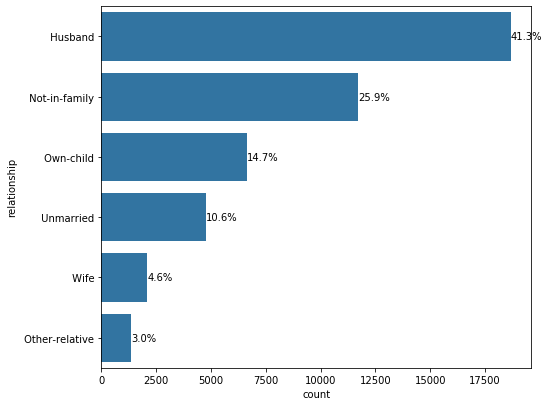

In [11]:
base_color = sb.color_palette()[0]
relationshipcounts = data['relationship'].value_counts()
relationshiporder = relationshipcounts.index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
sb.countplot(data = data, y = 'relationship', color = base_color,order = relationshiporder,ax=ax);
for i in range(relationshipcounts.shape[0]):
    count = relationshipcounts[i]
    pctstring = '{:0.1f}%'.format(100*count/data.shape[0])
    plt.text(count+1,i,pctstring,va = 'center');

<h6>Barplot of race</h6>

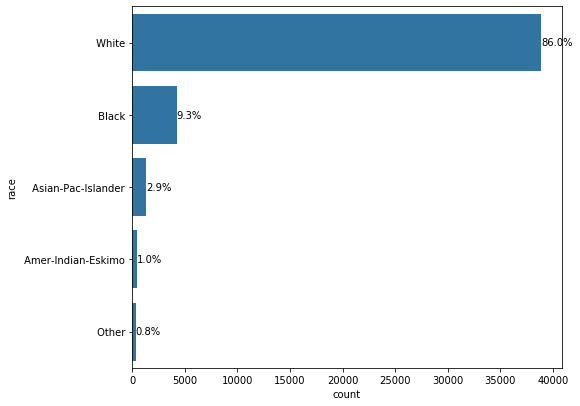

In [12]:
base_color = sb.color_palette()[0]
racecounts = data['race'].value_counts()
raceorder = racecounts.index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
sb.countplot(data = data, y = 'race', color = base_color,order = raceorder,ax=ax);
for i in range(racecounts.shape[0]):
    count = racecounts[i]
    pctstring = '{:0.1f}%'.format(100*count/data.shape[0])
    plt.text(count+1,i,pctstring,va = 'center');

<h6>Bar plot of sex</h6>

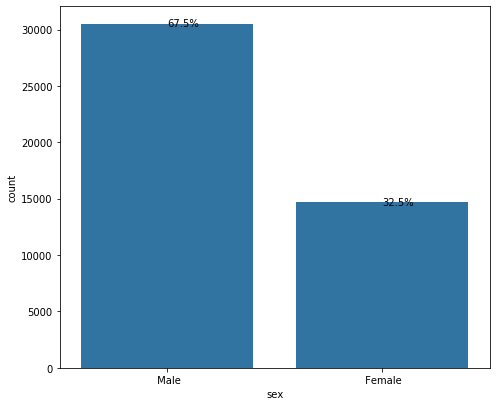

In [13]:
base_color = sb.color_palette()[0]
sexcounts = data['sex'].value_counts()
sexorder = sexcounts.index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
sb.countplot(data = data, x = 'sex', color = base_color,order = sexorder,ax=ax);
for i in range(sexcounts.shape[0]):
    count = sexcounts[i]
    pctstring = '{:0.1f}%'.format(100*count/data.shape[0])
    plt.text(i,count+1,pctstring,va = 'center');

<h6>Bar plot of native-country</h6>

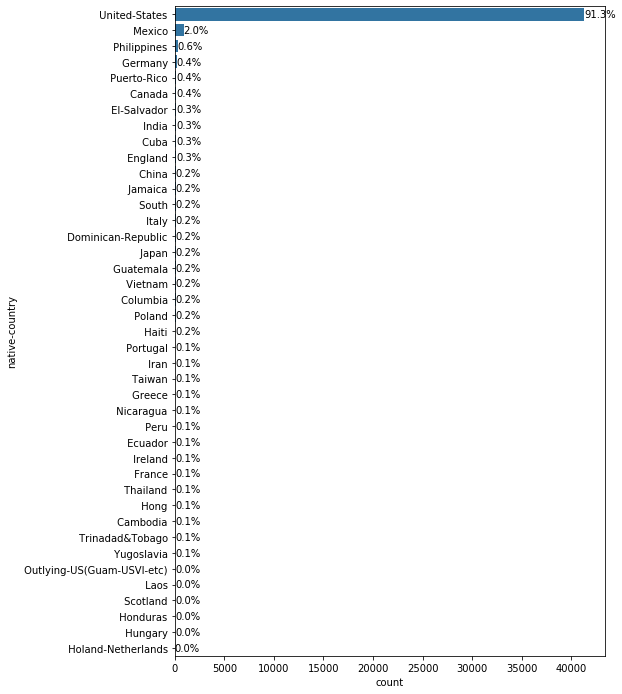

In [14]:
base_color = sb.color_palette()[0]
nativecountrycounts = data['native-country'].value_counts()
nativecountryorder = nativecountrycounts.index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 2.255])
sb.countplot(data = data, y = 'native-country', color = base_color,order = nativecountryorder,ax=ax);
for i in range(nativecountrycounts.shape[0]):
    count = nativecountrycounts[i]
    pctstring = '{:0.1f}%'.format(100*count/data.shape[0])
    plt.text(count+1,i,pctstring,va = 'center');

<h6>Histogram of age</h6>

(array([ 10,  30, 100]), <a list of 3 Text xticklabel objects>)

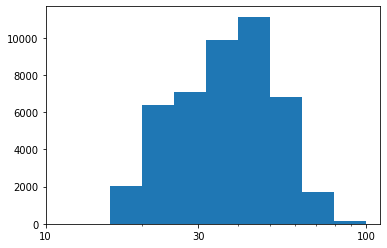

In [15]:
np.log10(data['age'].describe())
bins  = 10 ** np.arange(1.1,1.95+0.1,0.1)
ticks = [10, 30, 100]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = data,x = 'age',bins=bins);
plt.xscale('log');
plt.xticks(ticks, labels)
plt.xticks(rotation = 0)

<h6>Histogram of no of education years</h6>

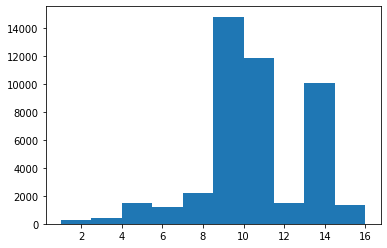

In [16]:
plt.hist(data = data,x = 'education-num',bins=10);

<h6>Histogram of hours-per-week</h6>

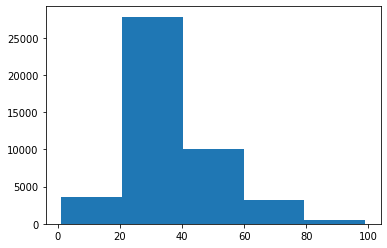

In [17]:
plt.hist(data = data,x = 'hours-per-week',bins=5);

<h6>Histogram of capital-gain</h6>

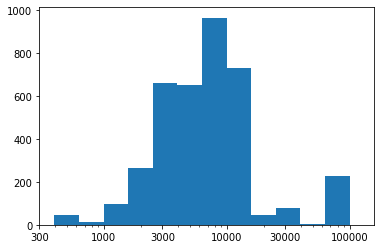

In [18]:
np.log10(data['capital-gain'].apply(lambda x: x+1).describe());
bins  = 10 ** np.arange(1,5+0.1,0.2);
ticks = [10, 30, 100, 300, 1000,3000,10000,30000,100000];
labels = ['{}'.format(val) for val in ticks];
plt.hist(data = data,x = 'capital-gain',bins=bins);
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xticks(rotation = 0);
plt.xlim(xmin = 300);

<h6>Histogram of capital-loss</h6>

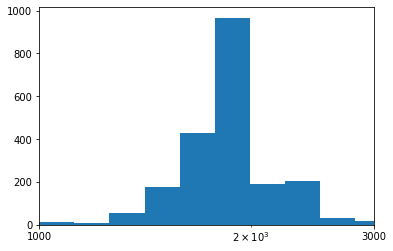

In [19]:
np.log10(data['capital-loss'].apply(lambda x: x+1).describe())
bins  = 10 ** np.arange(1,3.7+0.1,0.05);
ticks = [10, 30, 100, 300, 1000,3000,10000];
labels = ['{}'.format(val) for val in ticks];
plt.hist(data = data,x = 'capital-loss',bins=bins);
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xticks(rotation = 0);
plt.xlim(xmin=1000,xmax=3000);

<h6>Age vs Income class</h6>

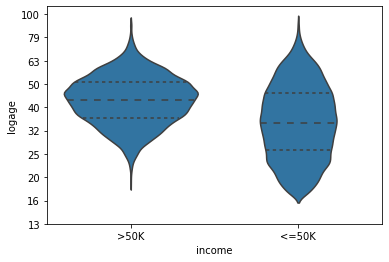

In [20]:
data['logage'] = np.log10(data['age']);
yticks =  np.arange(1.1,1.95+0.1,0.1);
ylabels = ['{:0.0f}'.format(10 ** val) for val in yticks];
result = data.groupby(["income"])['age'].aggregate(np.mean).reset_index().sort_values('age', ascending=False);
base_color = sb.color_palette()[0];
gh = sb.violinplot(data = data, x = 'income', y = 'logage', \
                   color = base_color,inner = 'quartile',order= result['income']);
plt.yticks(yticks, ylabels);

<h6>Income group of greater than 50k seems to have large number of people in age group 32 to 50 as compared to other group,indirectly people in age group 32 to 50 seems to have more number of people having income >50k as compared to less than 50k</h6>

<h6>Income group vs education num </h6>

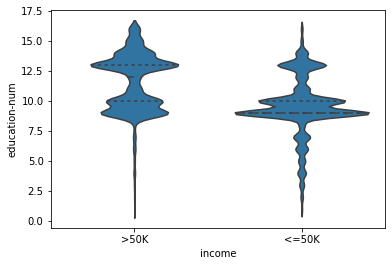

In [21]:
result = data.groupby(["income"])['education-num'].aggregate(np.mean).reset_index().sort_values('education-num', ascending=False);
base_color = sb.color_palette()[0];
gh = sb.violinplot(data = data, x = 'income', y = 'education-num', \
                   color = base_color,inner = 'quartile',order= result['income']);

<h6>People with more than 50k seems to have more no of people done higher education as compared to people with less than 50k income group which has more people having their education years between 7.5 to 10</h6>

<h6>Income group vs capital gain</h6>

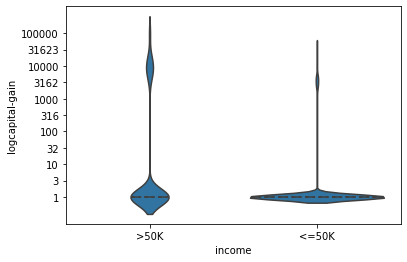

In [22]:
data['logcapital-gain'] = np.log10(data['capital-gain'].apply(lambda x: x+1));
yticks =  np.arange(0,5+0.1,0.5);
ylabels = ['{:0.0f}'.format(10 ** val) for val in yticks];
result = data.groupby(["income"])['capital-gain'].aggregate(np.mean).reset_index().sort_values('capital-gain', ascending=False);
base_color = sb.color_palette()[0];
gh = sb.violinplot(data = data, x = 'income', y = 'logcapital-gain', \
                   color = base_color,inner = 'quartile',order= result['income']);
plt.yticks(yticks, ylabels);

<h6>Most of people doesn't seem to have capital gain at all and the large no of people of less than 50k group having low captial gain is probably because percentage of people having less than 50k income is more than 75%</h6>

<h6>Income group vs capital loss</h6>

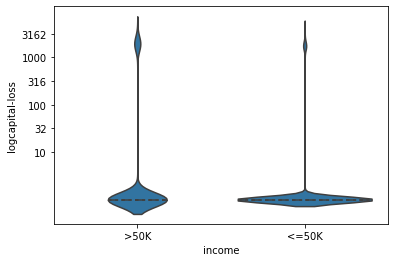

In [23]:
data['logcapital-loss'] = np.log10(data['capital-loss'].apply(lambda x: x+1));
yticks =  np.arange(1,3.7+0.1,0.5);
ylabels = ['{:0.0f}'.format(10 ** val) for val in yticks];
result = data.groupby(["income"])['capital-loss'].aggregate(np.mean).reset_index().sort_values('capital-loss', ascending=False);
base_color = sb.color_palette()[0];
gh = sb.violinplot(data = data, x = 'income', y = 'logcapital-loss', \
                   color = base_color,inner = 'quartile',order= result['income']);
plt.yticks(yticks, ylabels);

<h6>Most of people doesn't seem to have capital loss at all and the large no of people of less than 50k group having low captial loss is probably because percentage of people having less than 50k income is more than 75%</h6>

<h6>Income class vs workclass</h6>

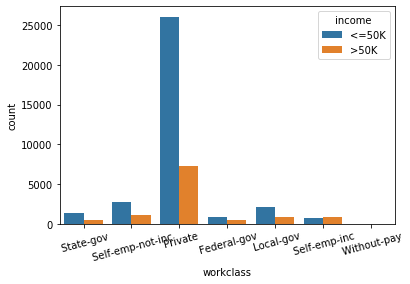

In [24]:
sb.countplot(data = data, x = 'workclass', hue = 'income');
plt.xticks(rotation=15);

<h6>For private sector employees there is drastic difference between counts of our income groups,but it could also be attributed tomost of people belonging to private sector</h6>

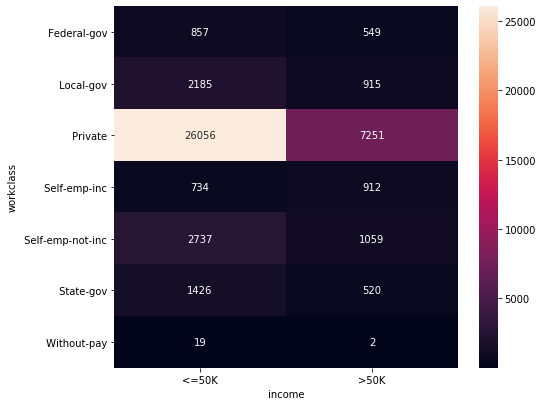

In [25]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
ct_counts = data.groupby(['workclass', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'workclass', columns = 'income', values = 'count')
axis=sb.heatmap(ct_counts, annot = True, fmt = 'd',ax=ax);
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5);

<h6>For private,self empl not inc,state gov and without pay there is drastic difference between counts of our two income groups as compared to other categories</h6>

<h6>Income and education level</h6>

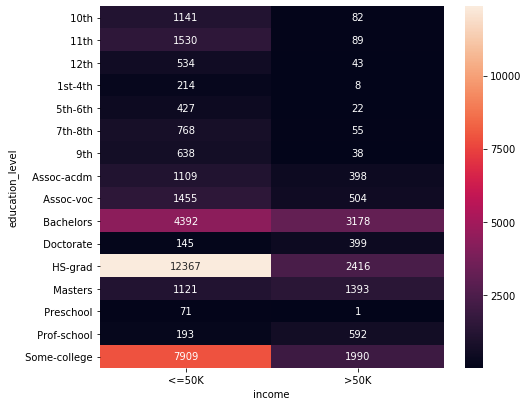

In [26]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
ct_counts = data.groupby(['education_level', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'education_level', columns = 'income', values = 'count')
axis=sb.heatmap(ct_counts, annot = True, fmt = 'd',ax=ax);
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5);

<h6>For lower education levels there is drastic difference between our income groups however as education level increases,the difference also seems to reduce</h6>

<h6>Incomegroup vs marital status</h6>

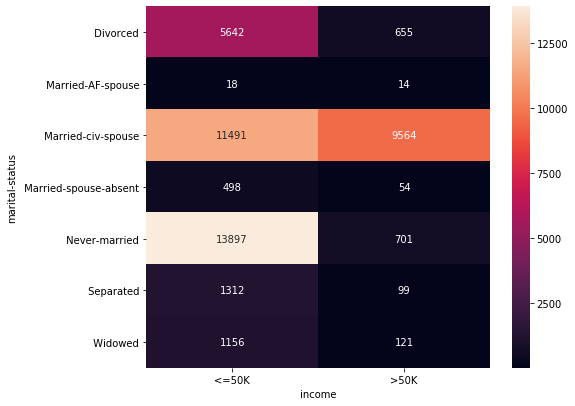

In [27]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
ct_counts = data.groupby(['marital-status', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'marital-status', columns = 'income', values = 'count')
axis=sb.heatmap(ct_counts, annot = True, fmt = 'd',ax=ax);
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5);

<h6>Except for married af spouse and married civ spouse categories there is drastic differnce between counts of income groups</h6>

<h6>Income group and occupation</h6>

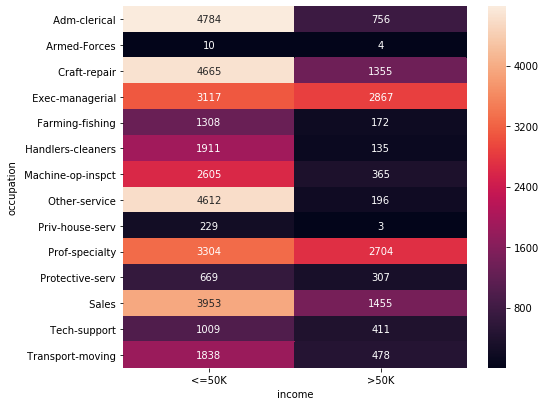

In [28]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
ct_counts = data.groupby(['occupation', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'occupation', columns = 'income', values = 'count')
axis=sb.heatmap(ct_counts, annot = True, fmt = 'd',ax=ax);
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5);

<h6>Except for exec managerial and prof speciality there is drastic difference between counts of our income groups,specially in private house services group</h6>

<h6>Income group and relationship</h6>

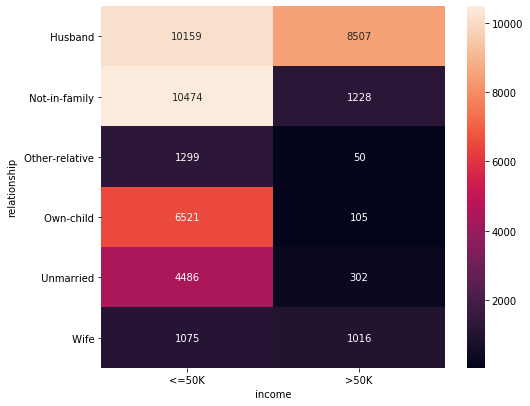

In [29]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
ct_counts = data.groupby(['relationship', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'relationship', columns = 'income', values = 'count')
axis=sb.heatmap(ct_counts, annot = True, fmt = 'd',ax=ax);
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5);

<h6>Except for husband,not in family and wife relationship there is drastic difference between counts of income groups for different catageories</h6>

<h6>Income and race</h6>

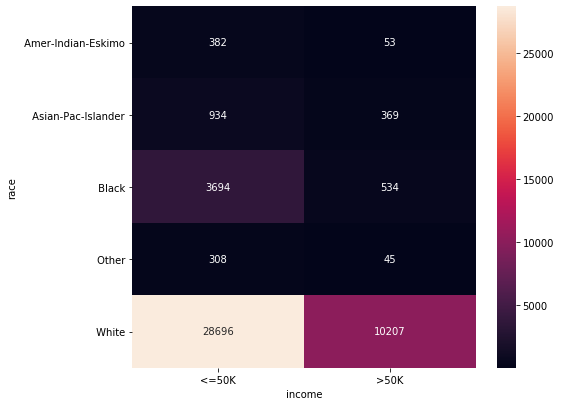

In [30]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
ct_counts = data.groupby(['race', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'race', columns = 'income', values = 'count')
axis=sb.heatmap(ct_counts, annot = True, fmt = 'd',ax=ax);
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5);

<h6>Income and sex</h6>

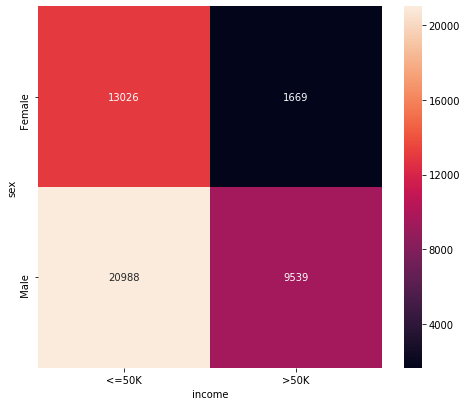

In [31]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, 0.995, 1.255])
ct_counts = data.groupby(['sex', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'sex', columns = 'income', values = 'count')
axis=sb.heatmap(ct_counts, annot = True, fmt = 'd',ax=ax);
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5);

<h6>Age vs education no vs income class</h6>

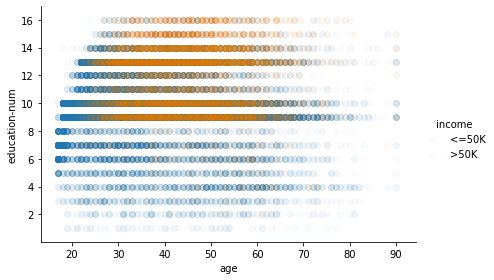

In [32]:
g=sb.FacetGrid(data=data,hue='income',height=4,aspect=1.5,hue_order=['<=50K','>50K'])
g = g.map(sb.regplot,'age','education-num', scatter_kws = {'alpha' : 1/40},fit_reg=False)
g.add_legend();
# sb.regplot(data = data, x = 'age', y = 'education-num', scatter_kws = {'alpha' : 1/40},fit_reg=False);

<h6>Education vs hours per week vs income</h6>

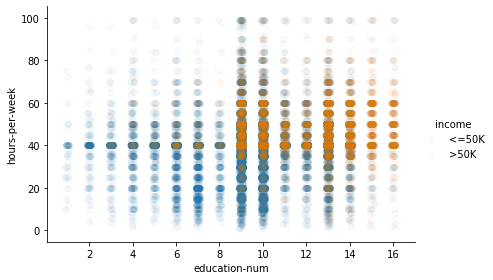

In [33]:
g=sb.FacetGrid(data=data,hue='income',height=4,aspect=1.5,hue_order=['<=50K','>50K'])
g = g.map(sb.regplot,'education-num','hours-per-week', scatter_kws = {'alpha' : 1/40},fit_reg=False,x_jitter = 0.1)
g.add_legend();

<h6>Age vs hours per week</h6>

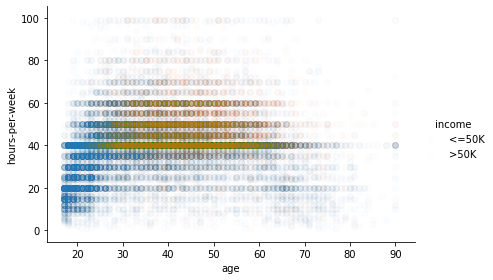

In [34]:
g=sb.FacetGrid(data=data,hue='income',height=4,aspect=1.5,hue_order=['<=50K','>50K'])
g = g.map(sb.regplot,'age','hours-per-week', scatter_kws = {'alpha' : 1/80},fit_reg=False)
g.add_legend();

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

C:\Users\Parth\Documents\Udacity\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


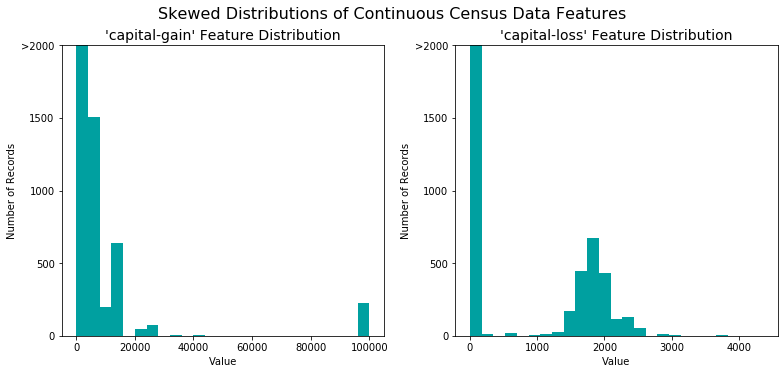

In [35]:
# Split the data into features and target label
data.drop(['logage', 'logcapital-gain','logcapital-loss'], axis=1, inplace=True)
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)
print(data.columns)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

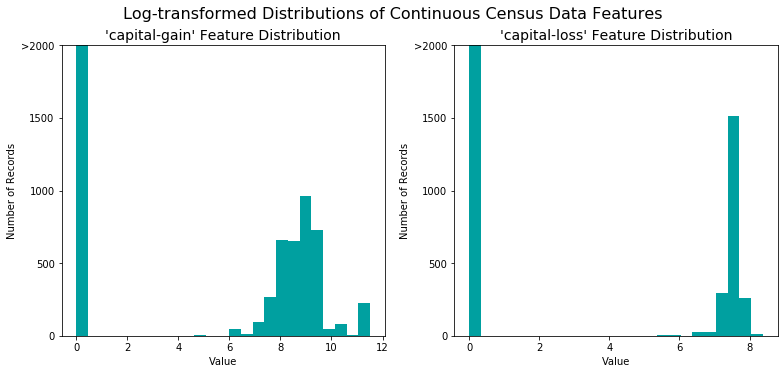

In [36]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))
# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [37]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [38]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 1 if x == ">50K" else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)
print(income.head(10))
print(income_raw.head(10))

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [39]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [40]:
TP = np.sum(income)
FP = income.count() - TP
TN = 0
FN = 0
accuracy = TP/(TP+FP) #np.sum(income == 1) / len(income)
recall = 1
precision = accuracy
# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta ** 2) * (accuracy * recall) / (beta ** 2 * accuracy + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [41]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = (end - start)
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = (end - start)
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
       
    # Success
    print("{} trained on {} samples. Train time:{:0.2f} Pred Time:{:0.2f} Acc Train:{:0.2f} Acc Test:{:0.2f} F Train:{:0.2f} F Test:{:0.2f}".format(learner.__class__.__name__, sample_size,\
                                                                                     results['train_time'],results['pred_time'],results['acc_train'],results['acc_test'],\
                                                                                                                     results['f_train'],results['f_test']))
    print("\n")
        
    # Return the results
    return results

LogisticRegression trained on 361 samples. Train time:0.31 Pred Time:0.01 Acc Train:0.85 Acc Test:0.82 F Train:0.72 F Test:0.64


LogisticRegression trained on 3617 samples. Train time:0.14 Pred Time:0.01 Acc Train:0.85 Acc Test:0.84 F Train:0.70 F Test:0.68


LogisticRegression trained on 36177 samples. Train time:2.32 Pred Time:0.01 Acc Train:0.85 Acc Test:0.84 F Train:0.70 F Test:0.68


DecisionTreeClassifier trained on 361 samples. Train time:0.06 Pred Time:0.03 Acc Train:1.00 Acc Test:0.76 F Train:1.00 F Test:0.51


DecisionTreeClassifier trained on 3617 samples. Train time:0.07 Pred Time:0.02 Acc Train:1.00 Acc Test:0.80 F Train:1.00 F Test:0.60


DecisionTreeClassifier trained on 36177 samples. Train time:0.72 Pred Time:0.02 Acc Train:0.97 Acc Test:0.82 F Train:0.96 F Test:0.63


AdaBoostClassifier trained on 361 samples. Train time:0.19 Pred Time:0.38 Acc Train:0.89 Acc Test:0.82 F Train:0.80 F Test:0.63


AdaBoostClassifier trained on 3617 samples. Train time:0.56 Pred Time:0.

C:\Users\Parth\Documents\Udacity\visuals.py:119: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


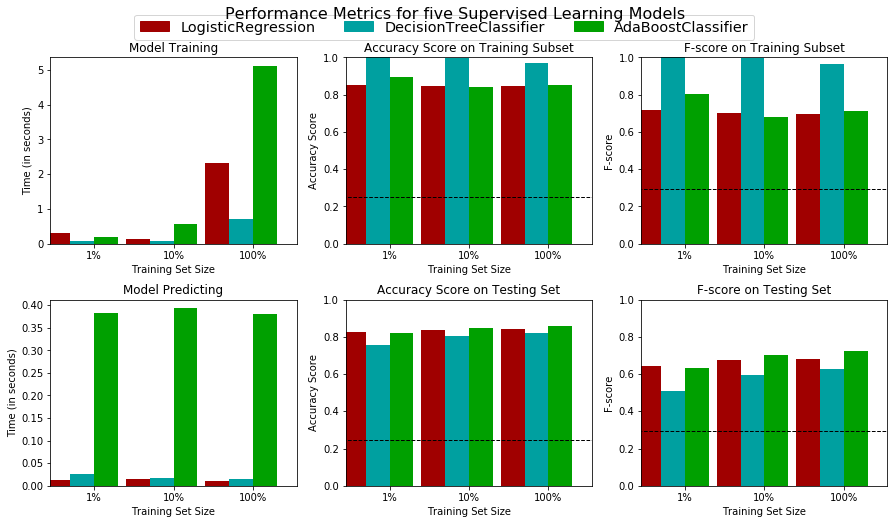

In [42]:

# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import visuals as vs1
# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=42,max_iter=10000)
clf_B = DecisionTreeClassifier(random_state=42)
clf_C = AdaBoostClassifier(random_state=42)
# clf_C = SVC(random_state=42)
# clf_C = BernoulliNB()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.10 * samples_100)
samples_1 = int(0.10 * samples_10)

# Collect results on the learners
results = {}
for clf in [clf_A,clf_B,clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if(clf_name == 'LogisticRegression'):
            dropColumns = ['workclass_ Federal-gov','education_level_ 10th','marital-status_ Divorced',\
              'occupation_ Adm-clerical','relationship_ Husband','race_ Amer-Indian-Eskimo','sex_ Female',\
              'native-country_ Cambodia']
            results[clf_name][i] = \
            train_predict(clf, samples, X_train.drop(dropColumns, axis=1), y_train, X_test.drop(dropColumns, axis=1), y_test)
        else:
            results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs1.evaluate(results, accuracy, fscore)

BaggingClassifier trained on 361 samples. Train time:0.05 Pred Time:0.14 Acc Train:0.98 Acc Test:0.81 F Train:0.99 F Test:0.61


BaggingClassifier trained on 3617 samples. Train time:0.31 Pred Time:0.14 Acc Train:0.99 Acc Test:0.84 F Train:0.99 F Test:0.67


BaggingClassifier trained on 36177 samples. Train time:5.02 Pred Time:0.17 Acc Train:0.97 Acc Test:0.84 F Train:0.96 F Test:0.68


AdaBoostClassifier trained on 361 samples. Train time:0.15 Pred Time:0.36 Acc Train:0.89 Acc Test:0.82 F Train:0.80 F Test:0.63


AdaBoostClassifier trained on 3617 samples. Train time:0.55 Pred Time:0.40 Acc Train:0.84 Acc Test:0.85 F Train:0.68 F Test:0.70


AdaBoostClassifier trained on 36177 samples. Train time:4.72 Pred Time:0.53 Acc Train:0.85 Acc Test:0.86 F Train:0.71 F Test:0.72


RandomForestClassifier trained on 361 samples. Train time:0.41 Pred Time:0.24 Acc Train:1.00 Acc Test:0.82 F Train:1.00 F Test:0.62


RandomForestClassifier trained on 3617 samples. Train time:0.79 Pred Time:0.25 Acc 

C:\Users\Parth\Documents\Udacity\visuals.py:119: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


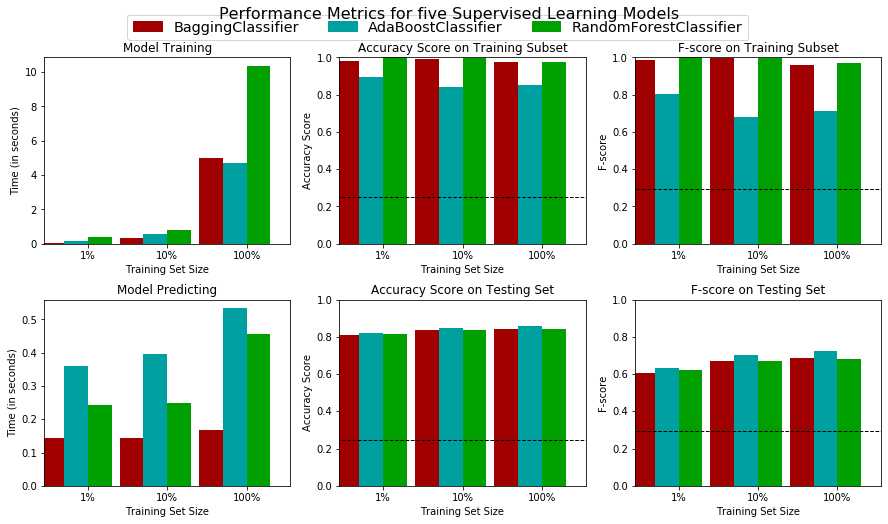

In [43]:

# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import visuals as vs1
# TODO: Initialize the three models
clf_A = BaggingClassifier(random_state=42)
clf_B = AdaBoostClassifier(random_state=42)
# #clf_C = DecisionTreeClassifier(random_state = 42)
clf_C = RandomForestClassifier(random_state=42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.10 * samples_100)
samples_1 = int(0.10 * samples_10)

# Collect results on the learners
results = {}
for clf in [clf_A,clf_B,clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if(clf_name == 'LogisticRegression'):
            dropColumns = ['workclass_ Federal-gov','education_level_ 10th','marital-status_ Divorced',\
              'occupation_ Adm-clerical','relationship_ Husband','race_ Amer-Indian-Eskimo','sex_ Female',\
              'native-country_ Cambodia']
            results[clf_name][i] = \
            train_predict(clf, samples, X_train.drop(dropColumns, axis=1), y_train, X_test.drop(dropColumns, axis=1), y_test)
        else:
            results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs1.evaluate(results, accuracy, fscore)

GaussianNB trained on 361 samples. Train time:0.01 Pred Time:0.02 Acc Train:0.77 Acc Test:0.79 F Train:0.48 F Test:0.54


GaussianNB trained on 3617 samples. Train time:0.01 Pred Time:0.01 Acc Train:0.78 Acc Test:0.79 F Train:0.50 F Test:0.55


GaussianNB trained on 36177 samples. Train time:0.01 Pred Time:0.00 Acc Train:0.77 Acc Test:0.79 F Train:0.49 F Test:0.56


SVC trained on 361 samples. Train time:0.07 Pred Time:0.32 Acc Train:0.85 Acc Test:0.82 F Train:0.73 F Test:0.63


SVC trained on 3617 samples. Train time:1.25 Pred Time:2.32 Acc Train:0.86 Acc Test:0.83 F Train:0.74 F Test:0.66


SVC trained on 36177 samples. Train time:136.04 Pred Time:19.98 Acc Train:0.85 Acc Test:0.84 F Train:0.72 F Test:0.69




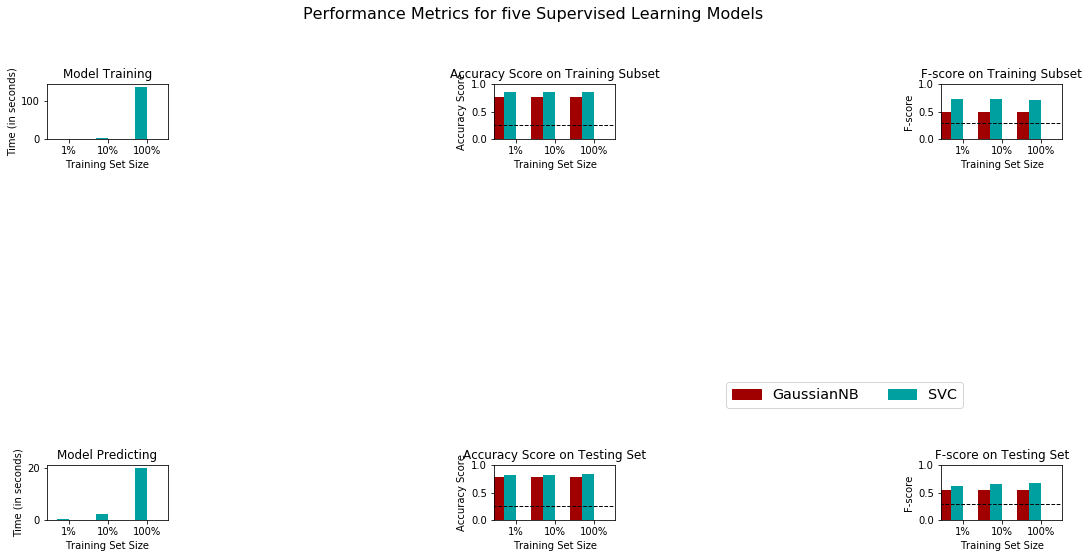

In [44]:

# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import visuals as vs1
# TODO: Initialize the three models
clf_A = SVC(random_state=42)
clf_B = GaussianNB()
# clf_C = SVC(random_state=42)
# clf_C = BernoulliNB()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.10 * samples_100)
samples_1 = int(0.10 * samples_10)

# Collect results on the learners
results = {}
for clf in [clf_B,clf_A]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if(clf_name == 'LogisticRegression'):
            dropColumns = ['workclass_ Federal-gov','education_level_ 10th','marital-status_ Divorced',\
              'occupation_ Adm-clerical','relationship_ Husband','race_ Amer-Indian-Eskimo','sex_ Female',\
              'native-country_ Cambodia']
            results[clf_name][i] = \
            train_predict(clf, samples, X_train.drop(dropColumns, axis=1), y_train, X_test.drop(dropColumns, axis=1), y_test)
        elif(clf_name == 'GaussianNB'):
            numerical = ['age', 'education-num', 'hours-per-week']
            results[clf_name][i] = train_predict(clf, samples, X_train[[*numerical]], y_train, X_test[[*numerical]], y_test)
        else:
            results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs1.evaluate(results, accuracy, fscore)

<h6>Logistic Regression Tuning</h6>

In [45]:

# # TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
# from sklearn.metrics import make_scorer, fbeta_score, roc_auc_score
# from sklearn.model_selection import GridSearchCV

# # TODO: Initialize the classifier
# clf = LogisticRegression(random_state=42,max_iter=10000)

# # TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# # HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
# parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#               'penalty': ['l1', 'l2']
#               ,'solver' : ['lbfgs','liblinear','newton-cg','sag','saga']
# #               ,'solver' : ['lbfgs','liblinear']
#              }

# dropColumns = ['workclass_ Federal-gov','education_level_ 10th','marital-status_ Divorced','occupation_ Adm-clerical',\
#                'relationship_ Husband','race_ Amer-Indian-Eskimo','sex_ Female','native-country_ Cambodia']

# # TODO: Make an fbeta_score scoring object
# scorer = make_scorer(fbeta_score, beta=0.5)

# # TODO: Perform grid search on the classifier using 'scorer' as the scoring method
# grid_obj = GridSearchCV(clf, parameters, scoring = scorer,cv=5,n_jobs=-1)

# # TODO: Fit the grid search object to the training data and find the optimal parameters
# grid_fit = grid_obj.fit(X_train.drop(dropColumns, axis=1), y_train)

# # Get the estimator
# best_clf = grid_fit.best_estimator_

# # Make predictions using the unoptimized and model
# predictions = (clf.fit(X_train.drop(dropColumns, axis=1), y_train)).predict(X_test.drop(dropColumns, axis=1))
# best_predictions = best_clf.predict(X_test.drop(dropColumns, axis=1))

# # Report the before-and-afterscores
# print("Unoptimized model\n------")
# print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
# print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
# print("ROC score on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
# print("\nOptimized Model\n------")
# print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
# print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
# print("ROC score on testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))
# print("\n------")
# print(grid_fit.best_params_)
# Unoptimized model
# ------
# Accuracy score on testing data: 0.8417
# F-score on testing data: 0.6826
# ROC score on testing data: 0.7583

# Optimized Model
# ------
# Final accuracy score on the testing data: 0.8419
# Final F-score on the testing data: 0.6832
# ROC score on testing data: 0.7586

# ------
# {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

<h6>SVM tuning</h6>

In [46]:

# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
# from sklearn.metrics import make_scorer, fbeta_score, roc_auc_score
# from sklearn.model_selection import GridSearchCV

# # TODO: Initialize the classifier
# clf = SVC(random_state=42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
# parameters = [
#     {'C': [0.001, 0.01, 0.1, 1, 10, 100],
#               'kernel': ['rbf'],
#                'gamma' :['scale','auto']+list(np.logspace(-3, 2, 6))
#              }
#               {'C': [0.001, 0.01, 0.1, 1, 10, 100],
#               'kernel': ['poly'],
#                'gamma' :['scale','auto']+list(np.logspace(-3, 2, 6)),
#                'degree':[1,2,3,4,5,6]
#              }
#               {
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100],
#                   'kernel': ['linear']
#               }
#              ]

# TODO: Make an fbeta_score scoring object
# scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
# grid_obj = GridSearchCV(clf, parameters, scoring = scorer,cv=5,n_jobs=-1,verbose=40)

# TODO: Fit the grid search object to the training data and find the optimal parameters
# grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
# best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
# predictions = (clf.fit(X_train, y_train)).predict(X_test)
# best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
# print("Unoptimized model\n------")
# print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
# print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
# print("ROC score on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
# print("\nOptimized Model\n------")
# print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
# print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
# print("ROC score on testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))
# print("\n------")
# print(grid_fit.best_params_)
# Unoptimized model
# ------
# Accuracy score on testing data: 0.8423
# F-score on testing data: 0.6851
# ROC score on testing data: 0.7565

# Optimized Model
# ------
# Final accuracy score on the testing data: 0.8412
# Final F-score on the testing data: 0.6836
# ROC score on testing data: 0.7514

# ------
# {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
# Unoptimized model
# ------
# Accuracy score on testing data: 0.8423
# F-score on testing data: 0.6851
# ROC score on testing data: 0.7565

# Optimized Model
# ------
# Final accuracy score on the testing data: 0.8392
# Final F-score on the testing data: 0.6803
# ROC score on testing data: 0.7437

# ------
# {'C': 0.01, 'kernel': 'linear'}

In [47]:
parameters = [
#     {'C': [0.001, 0.01, 0.1, 1, 10, 100],
#               'kernel': ['rbf'],
#                'gamma' :['scale','auto']+list(np.logspace(-3, 2, 6))
#              }
              {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['poly'],
               'gamma' :['scale','auto']+list(np.logspace(-3, 2, 6)),
               'degree':[1,2,3,4,5,6]
             }
#               {
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100],
#                   'kernel': ['linear']
#               }
             ]
parameters

[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'kernel': ['poly'],
  'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
  'degree': [1, 2, 3, 4, 5, 6]}]

<h6>Decision Tree Tuning</h6>

In [66]:
from sklearn.metrics import make_scorer, fbeta_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

parameters = [
             {'criterion': ['gini','entropy'],
              'max_depth': [None,2,4,8,16,32],
              'min_samples_split' :[2,4,8,16,32],
              'min_samples_leaf':[2,4,8,16,32],
              'max_features':[None,'sqrt','log2']
             }
             ]

scorer = make_scorer(fbeta_score, beta=0.5)

grid_obj = GridSearchCV(clf, parameters, scoring = scorer,cv=5,n_jobs=-1,verbose=40)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("ROC score on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("ROC score on testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))
print("\n------")
print(grid_fit.best_params_)
# Unoptimized model
# ------
# Accuracy score on testing data: 0.8186
# F-score on testing data: 0.6279
# ROC score on testing data: 0.7499

# Optimized Model
# ------
# Final accuracy score on the testing data: 0.8523
# Final F-score on the testing data: 0.7220
# ROC score on testing data: 0.7453

# ------
# {'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 16}

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   37.9s
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   48.1s
[Paralle

[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 415 tasks      | elapsed:   57.1s
[Paralle

[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:  1.1min
[Paralle

[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 681 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 683 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 684 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 685 tasks      | elapsed:  1.2min
[Paralle

[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 813 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 815 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 819 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 821 tasks      | elapsed:  1.3min
[Paralle

[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 947 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 949 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 950 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 951 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 953 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 954 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 955 tasks      | elapsed:  1.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1075 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1079 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1082 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1083 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1084 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1085 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1086 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1087 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1089 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1206 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1207 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1209 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1211 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1212 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1213 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1214 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1215 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1216 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1217 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1219 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1220 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1221 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1337 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1338 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1339 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1340 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1341 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1342 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1343 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1345 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1346 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1347 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1348 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1349 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1350 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1351 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1352 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1471 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1472 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1473 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1474 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1475 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1477 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1478 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1479 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1480 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1481 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1482 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1483 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1484 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1485 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1486 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1603 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1604 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1605 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1606 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1607 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1608 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1609 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1610 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1611 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1612 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1613 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1614 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1615 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1617 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1618 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1734 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1735 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1737 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1738 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1739 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1740 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1741 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1742 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1743 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1744 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1745 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1746 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1747 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1748 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1749 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1866 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1867 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1868 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1869 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1870 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1871 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1872 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1873 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1874 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1875 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1876 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1877 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1878 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1879 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1880 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1881 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1997 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1998 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1999 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2000 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2001 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2003 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2004 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2005 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2006 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2007 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2008 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2009 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2010 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2011 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2012 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2128 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2129 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2130 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2131 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2132 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2133 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2134 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2135 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2136 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2137 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2138 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2139 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2140 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2141 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2142 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2143 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2259 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2260 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2261 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2262 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2263 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2264 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2265 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2266 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2267 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2268 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2269 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2270 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2271 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2272 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2273 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2274 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2391 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2392 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2393 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2394 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2395 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2396 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2397 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2398 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2399 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2400 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2401 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2403 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2404 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2405 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2406 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2523 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2524 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2525 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2526 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2527 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2528 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2529 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2530 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2531 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2532 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2533 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2534 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2535 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2536 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2537 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2538 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2655 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2656 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2657 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2658 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2659 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2660 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2661 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2662 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2663 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2664 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2665 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2666 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2667 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2668 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2669 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2670 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2788 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2789 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2790 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2791 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2792 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2793 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2794 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2795 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2796 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2797 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2798 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2799 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2800 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2801 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2802 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2803 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2919 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2920 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2921 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2922 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2923 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2924 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2925 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2926 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2927 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2928 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2929 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2930 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2931 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2932 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2933 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2934 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3052 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3053 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3054 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3055 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3057 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3058 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3059 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3060 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3061 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3062 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3063 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3064 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 3065 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 3066 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 3067 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3186 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3187 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3189 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3190 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3191 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3193 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3194 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3195 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3197 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3198 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3199 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3201 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3319 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3320 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3321 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3322 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3323 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3324 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3325 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3326 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3327 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3328 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3329 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3330 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3331 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3332 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3333 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3334 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3450 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3451 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3452 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3453 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3454 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3455 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3456 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3457 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3458 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3459 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3460 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 3461 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 3462 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 3463 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 3464 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 3465 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3584 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 3585 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 3586 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 3587 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 3589 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3590 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3591 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3592 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3593 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3594 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3595 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3596 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3597 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3598 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3599 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3715 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 3716 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 3717 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 3718 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 3719 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 3720 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 3721 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 3722 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 3723 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 3724 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 3725 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 3726 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 3727 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 3728 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 3729 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 3730 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3847 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3849 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3850 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3851 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3852 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3853 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3854 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3855 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3857 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3858 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 3859 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 3860 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 3861 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 3862 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3978 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3979 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3980 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3981 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3982 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3983 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3984 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3985 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3986 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3987 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3988 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3989 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3990 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3991 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3992 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3993 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4109 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4110 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4111 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4112 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4113 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4114 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4115 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4116 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4117 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4118 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4119 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4120 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4121 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4122 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4123 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4124 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4241 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 4242 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 4243 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 4244 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4245 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4246 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4247 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4248 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4249 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4250 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4251 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4252 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4253 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4254 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4255 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4256 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4372 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 4373 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 4374 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 4375 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 4376 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4377 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4378 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4379 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4380 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4381 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4382 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4383 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4384 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4385 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4386 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4387 tasks      | elapsed: 

Unoptimized model
------
Accuracy score on testing data: 0.8186
F-score on testing data: 0.6279
ROC score on testing data: 0.7499

Optimized Model
------
Final accuracy score on the testing data: 0.8523
Final F-score on the testing data: 0.7220
ROC score on testing data: 0.7453

------
{'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 16}


In [49]:
parameters = [
             {'criterion': ['gini','entropy'],
              'max_depth': [None,2,4,8,16,32],
              'min_samples_split' :[2,4,8,16,32],
              'min_samples_leaf':[2,4,8,16,32],
              'max_features':[None,'sqrt','log2']
             }
             ]
parameters

[{'criterion': ['gini', 'entropy'],
  'max_depth': [None, 2, 4, 8, 16, 32],
  'min_samples_split': [2, 4, 8, 16, 32],
  'min_samples_leaf': [2, 4, 8, 16, 32],
  'max_features': [None, 'sqrt', 'log2']}]

In [50]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

<h6>Random Forest Tuning</h6>

In [51]:
# from sklearn.metrics import make_scorer, fbeta_score, roc_auc_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(random_state=42)

# parameters = [
#              {'criterion': ['gini','entropy'],
#               'max_depth': [None,2,4,8,16,32],
#               'min_samples_split' :[2,4,8,16,32],
#               'min_samples_leaf':[2,4,8,16,32],
#               'max_features':[None,'sqrt','log2'],
#               'n_estimators':[100,200,400,800,1000]
#              }
#              ]

# scorer = make_scorer(fbeta_score, beta=0.5)

# grid_obj = GridSearchCV(clf, parameters, scoring = scorer,cv=5,n_jobs=-1,verbose=40)

# grid_fit = grid_obj.fit(X_train, y_train)

# best_clf = grid_fit.best_estimator_

# predictions = (clf.fit(X_train, y_train)).predict(X_test)
# best_predictions = best_clf.predict(X_test)

# print("Unoptimized model\n------")
# print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
# print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
# print("ROC score on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
# print("\nOptimized Model\n------")
# print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
# print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
# print("ROC score on testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))
# print("\n------")
# print(grid_fit.best_params_)
# it takes 1hr to run 20 models

In [52]:
parameters = [
             {'criterion': ['gini','entropy'],
              'max_depth': [None,2,4,8,16,32],
              'min_samples_split' :[2,4,8,16,32],
              'min_samples_leaf':[2,4,8,16,32],
              'max_features':[None,'sqrt','log2'],
              'n_estimators':[100,200,400,800,1000]
             }
             ]
parameters

[{'criterion': ['gini', 'entropy'],
  'max_depth': [None, 2, 4, 8, 16, 32],
  'min_samples_split': [2, 4, 8, 16, 32],
  'min_samples_leaf': [2, 4, 8, 16, 32],
  'max_features': [None, 'sqrt', 'log2'],
  'n_estimators': [100, 200, 400, 800, 1000]}]

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.8126         |   0.8523        |
| F-score        |    0.627          |   0.7220        |

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?


Answer: In my opinion, the following five features are the most important ones.

capital-gain: Measure the profit one individual is achieved.

capital-loss: Similar to capital gain, it's a money sensitive feature.

education-num: Obviously, the higher the education level, the higher income one can get.

age: More experienced people might has a higher income than younger people.

Native country: Working in a developed country should have a better chance to get higher income.



### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

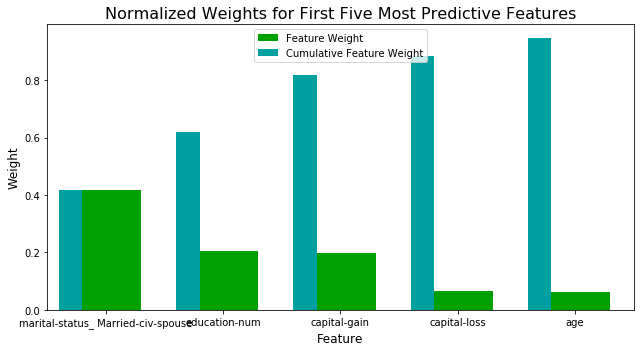

In [68]:

# TODO: Import a supervised learning model that has 'feature_importances_'
# best_clf=DecisionTreeClassifier(random_state=42,criterion='gini',max_depth=8,min_samples_leaf=2,min_samples_split=16)
# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = best_clf.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [63]:
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:5]]
values = importances[indices][:5]
print(columns)
print(values)
print(np.cumsum(values))

['marital-status_ Married-civ-spouse' 'education-num' 'capital-gain'
 'capital-loss' 'age']
[0.42046282 0.21540477 0.20060791 0.07037016 0.04227461]
[0.42046282 0.63586759 0.8364755  0.90684566 0.94912027]


<h6>Suprisingly marital-status_ Married-civ-spouse has most importance</h6>

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*.

In [69]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8523
F-score on testing data: 0.7220

Final Model trained on reduced data
------
Accuracy on testing data: 0.8524
F-score on testing data: 0.7212


<h6>There's only slight difference between accuracy and f2 score so we should instead use the top 5 relevant features instead of training the model with all features</h6>